In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)             
pd.set_option('display.max_columns', None)  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
file_path='C:\\Users\\abhin\\Downloads\\train (1).csv'

In [3]:
tt=pd.read_csv(file_path)
tt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
tt.shape

(891, 12)

In [5]:
tt.size

10692

In [6]:
tt.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
tt.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [8]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
tt.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
tt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
col=['PassengerId','Name','Ticket','Cabin','Parch']
tt.drop(col,axis=1,inplace=True)

In [12]:
num=tt.select_dtypes(include=['number']).columns
cat=tt.select_dtypes(include=['object', 'category']).columns
print('Cat:',cat)
print('num:',num)

Cat: Index(['Sex', 'Embarked'], dtype='object')
num: Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')


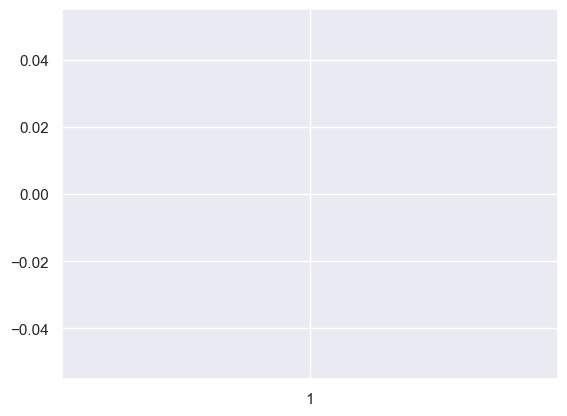

In [13]:
plt.boxplot(tt['Age'])
plt.show()


In [14]:
tt['Age']=tt['Age'].fillna(tt['Age'].mean())

**Categorical Analysis**

In [15]:
for i in cat:
    a=tt[i].unique()
    print(i,a)

Sex ['male' 'female']
Embarked ['S' 'C' 'Q' nan]


In [16]:
for i in cat:
    a=tt[i].nunique()
    print(i,a)

Sex 2
Embarked 3


**Bar Plot**

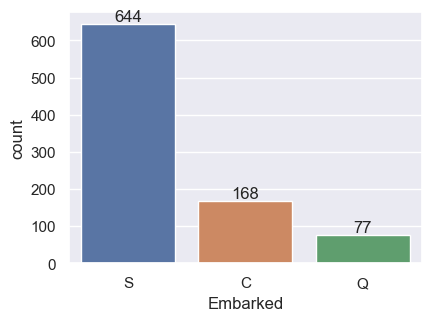

In [17]:
plt.figure(figsize=(10,15))
for i,column in enumerate(cat[1:]):
    plt.subplot(4,2,i+1)

    ax=sns.countplot(data=tt,x=column)
    ax.bar_label(ax.containers[0])
plt.show()

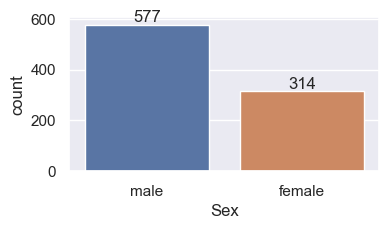

In [18]:
plt.figure(figsize=(4,2))
ax=sns.countplot(x=tt['Sex'])
ax.bar_label(ax.containers[0])
plt.show()

**Pie Chart**

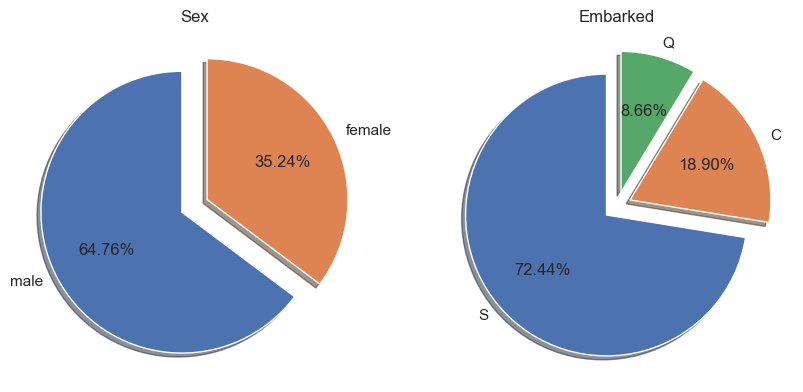

In [19]:
plt.figure(figsize=(10,10))
for i,column in enumerate(cat):
    plt.subplot(1,2,i+1)
    tt[column].value_counts()
    Property=tt[column].value_counts(normalize=True).keys()
    count=tt[column].value_counts(normalize=True).values
    Data=pd.DataFrame(zip(Property,count),columns=[column,'Count'])
    n=tt[column].nunique()
    l=[0.1 for i in range(n)]
    plt.title(column)
    plt.pie(x=count,labels=Property,autopct='%0.2f%%',shadow=True,radius=1,startangle=90,explode=l)
plt.show()

**Numerical Data Analysis**

In [20]:
for i in num:
    d_count=round(tt[i].count(),2)
    d_max=round(tt[i].max(),2)
    d_min=round(tt[i].min(),2)
    d_mean=round(tt[i].mean(),2)
    d_median=round(tt[i].median(),2)
    d_std=round(tt[i].std(),2)

    print(i,'count:',d_count)
    print(i,'max:',d_max)
    print(i,'min:',d_min)
    print(i,'mean:',d_mean)
    print(i,'median:',d_median)
    print(i,'std:',d_std)
    print('------------------------------------')

Survived count: 891
Survived max: 1
Survived min: 0
Survived mean: 0.38
Survived median: 0.0
Survived std: 0.49
------------------------------------
Pclass count: 891
Pclass max: 3
Pclass min: 1
Pclass mean: 2.31
Pclass median: 3.0
Pclass std: 0.84
------------------------------------
Age count: 891
Age max: 80.0
Age min: 0.42
Age mean: 29.7
Age median: 29.7
Age std: 13.0
------------------------------------
SibSp count: 891
SibSp max: 8
SibSp min: 0
SibSp mean: 0.52
SibSp median: 0.0
SibSp std: 1.1
------------------------------------
Fare count: 891
Fare max: 512.33
Fare min: 0.0
Fare mean: 32.2
Fare median: 14.45
Fare std: 49.69
------------------------------------


In [21]:
for i in num:
    q1=np.quantile(tt[i],0.25)
    q2=np.quantile(tt[i],0.50)
    q3=np.quantile(tt[i],0.75)
    print(i,'q1:',q1)
    print(i,'q2:',q2)
    print(i,'q3:',3)
    print('------------')

Survived q1: 0.0
Survived q2: 0.0
Survived q3: 3
------------
Pclass q1: 2.0
Pclass q2: 3.0
Pclass q3: 3
------------
Age q1: 22.0
Age q2: 29.69911764705882
Age q3: 3
------------
SibSp q1: 0.0
SibSp q2: 0.0
SibSp q3: 3
------------
Fare q1: 7.9104
Fare q2: 14.4542
Fare q3: 3
------------


In [22]:
tt.describe()

,Survived,Pclass,Age,SibSp,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208
std,0.486592,0.836071,13.002015,1.102743,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200


**Histogram**

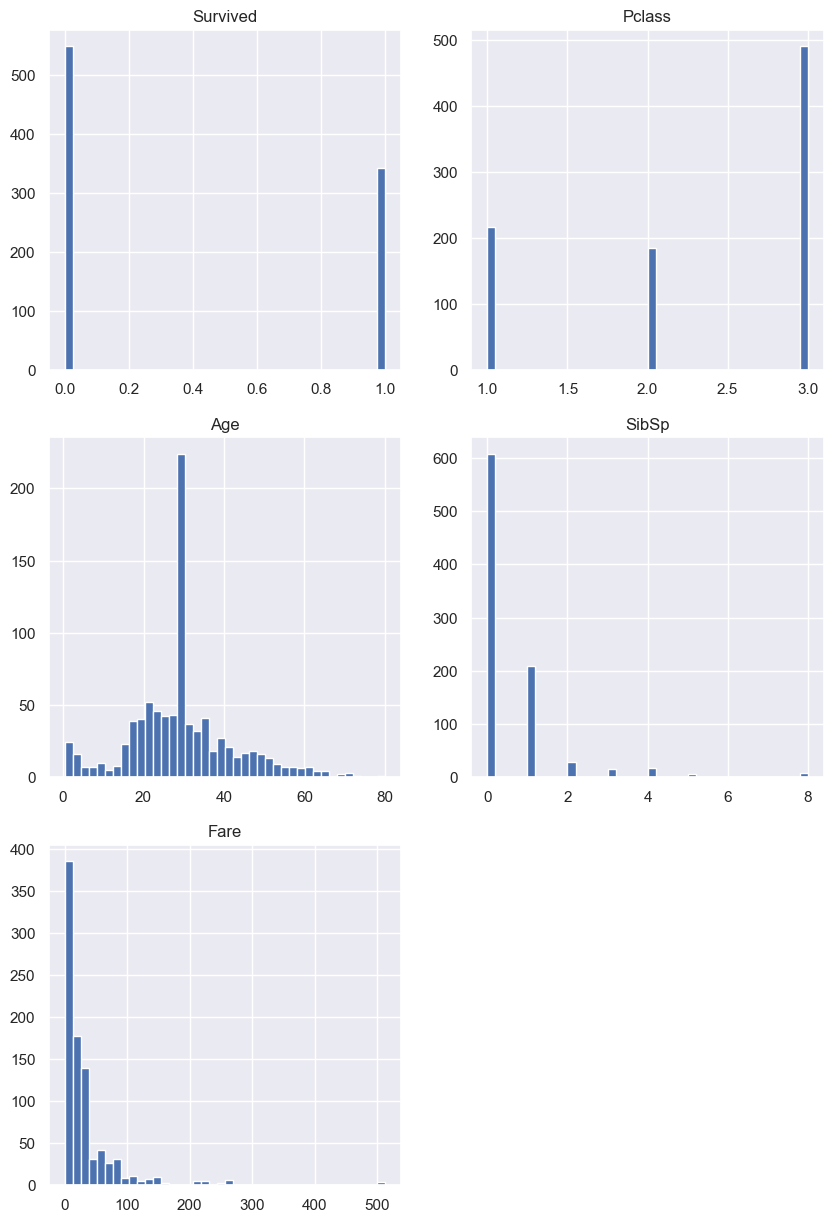

In [23]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.hist(tt[column],bins=40)
plt.show()

In [24]:
num

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')

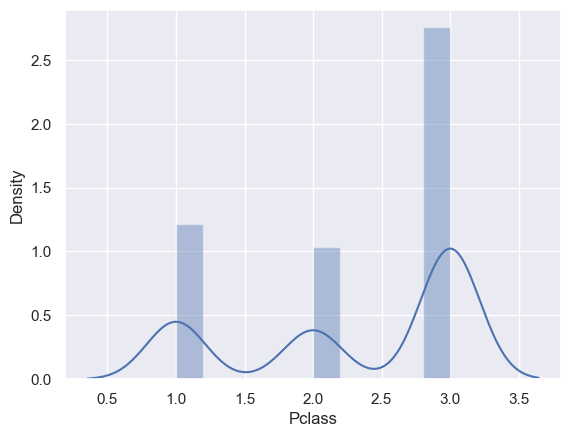

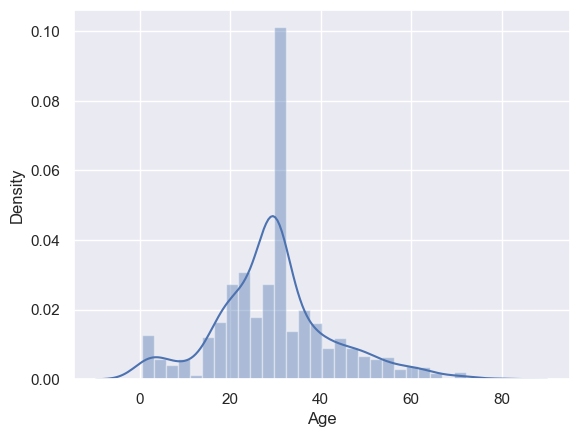

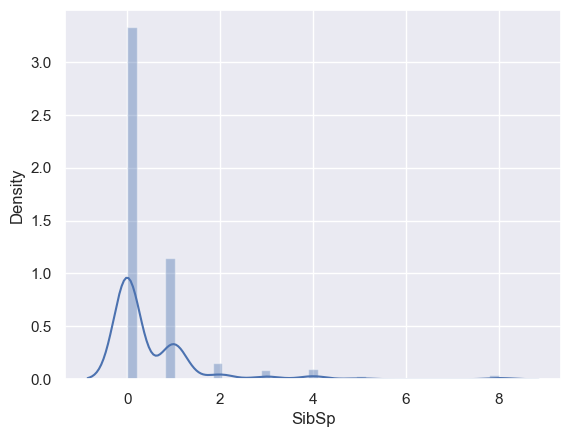

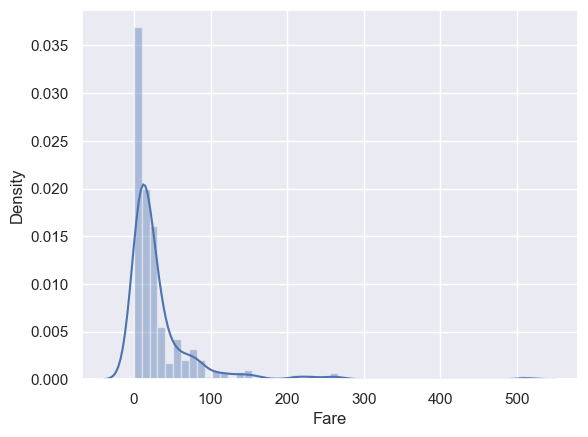

In [25]:
for i in num[1:]:
    #plt.subplot(3,2,i+1)
    sns.distplot(tt[i])
   # plt.subplot(3,2,i+1)
    plt.show()


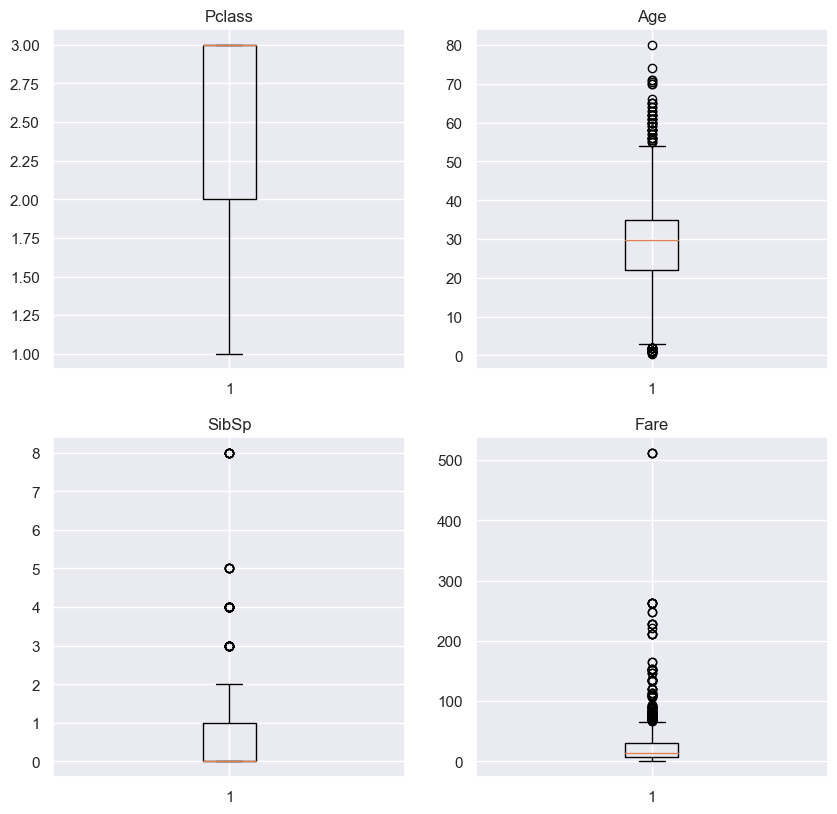

In [26]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num[1:]):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(tt[column])
plt.show()

In [27]:
q1=np.quantile(tt['Age'],0.25)
q2=np.quantile(tt['Age'],0.50)
q3=np.quantile(tt['Age'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=tt['Age']>ub1
con2=tt['Age']<lb1
outlier=tt[con1|con2]
len(outlier)

66

In [28]:
v=(len(outlier)/len(tt))*100
v

7.4074074074074066

In [29]:
tt["Age"]=np.clip(tt['Age'],lb1,ub1)

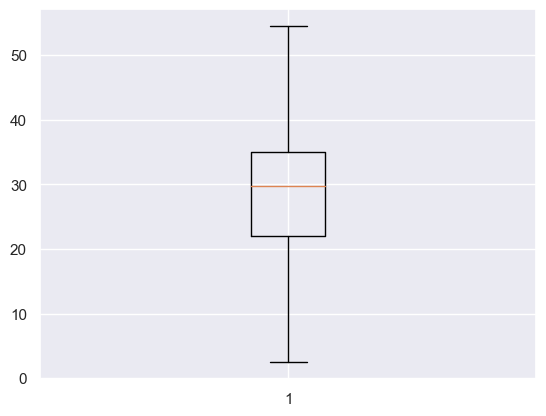

In [30]:
plt.boxplot(tt['Age'])
plt.show()


In [31]:
q1=np.quantile(tt['Fare'],0.25)
q2=np.quantile(tt['Fare'],0.50)
q3=np.quantile(tt['Fare'],0.75)

iqr=q3-q1

ub2=q3+(1.5*iqr)
lb2=q1-(1.5*iqr)

con1=tt['Fare']>ub2
con2=tt['Fare']<lb2
outlier1=tt[con1|con2]
len(outlier1)

116

In [32]:
v1=(len(outlier1)/len(tt))*100
v1

13.019079685746352

In [33]:
tt['Fare']=np.clip(tt['Fare'],lb1,ub1)

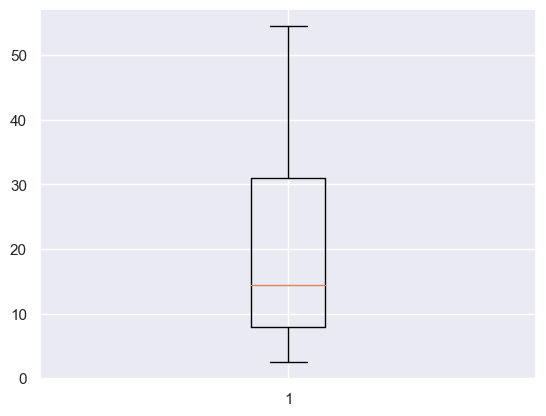

In [34]:
plt.boxplot(tt['Fare'])
plt.show()

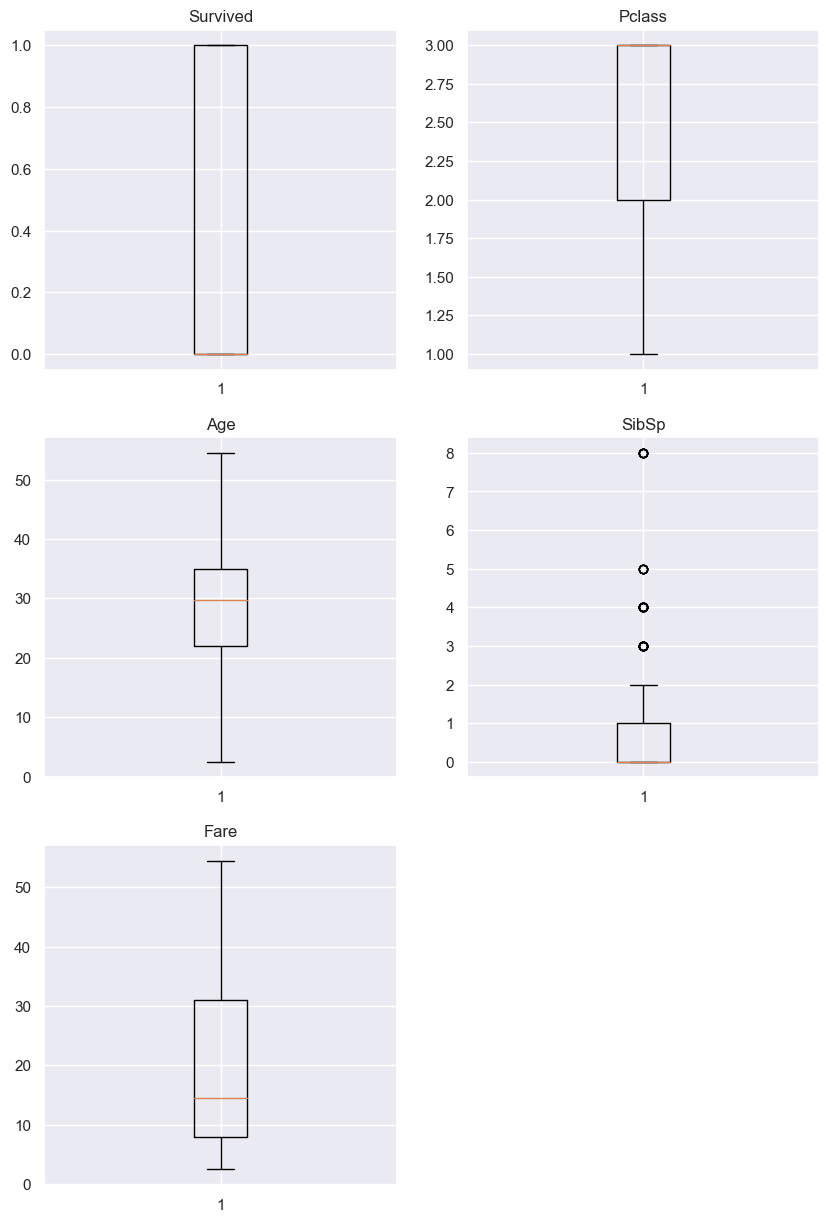

In [35]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(tt[column])
plt.show()

**Bivariate Analysis**

In [36]:
cat

Index(['Sex', 'Embarked'], dtype='object')

In [37]:
col1=pd.crosstab(tt['Sex'],tt['Embarked'])

In [38]:
col1

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


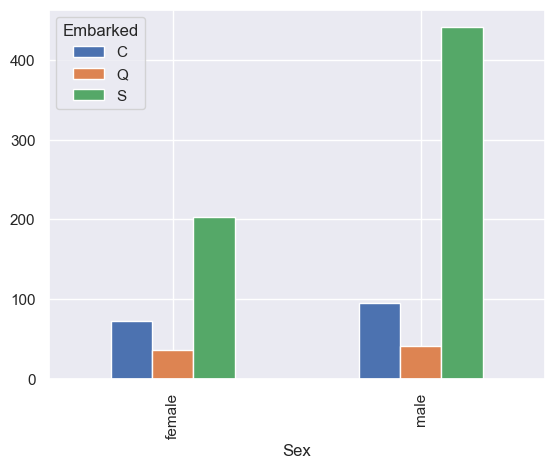

In [39]:
col1.plot(kind='bar')
plt.show()

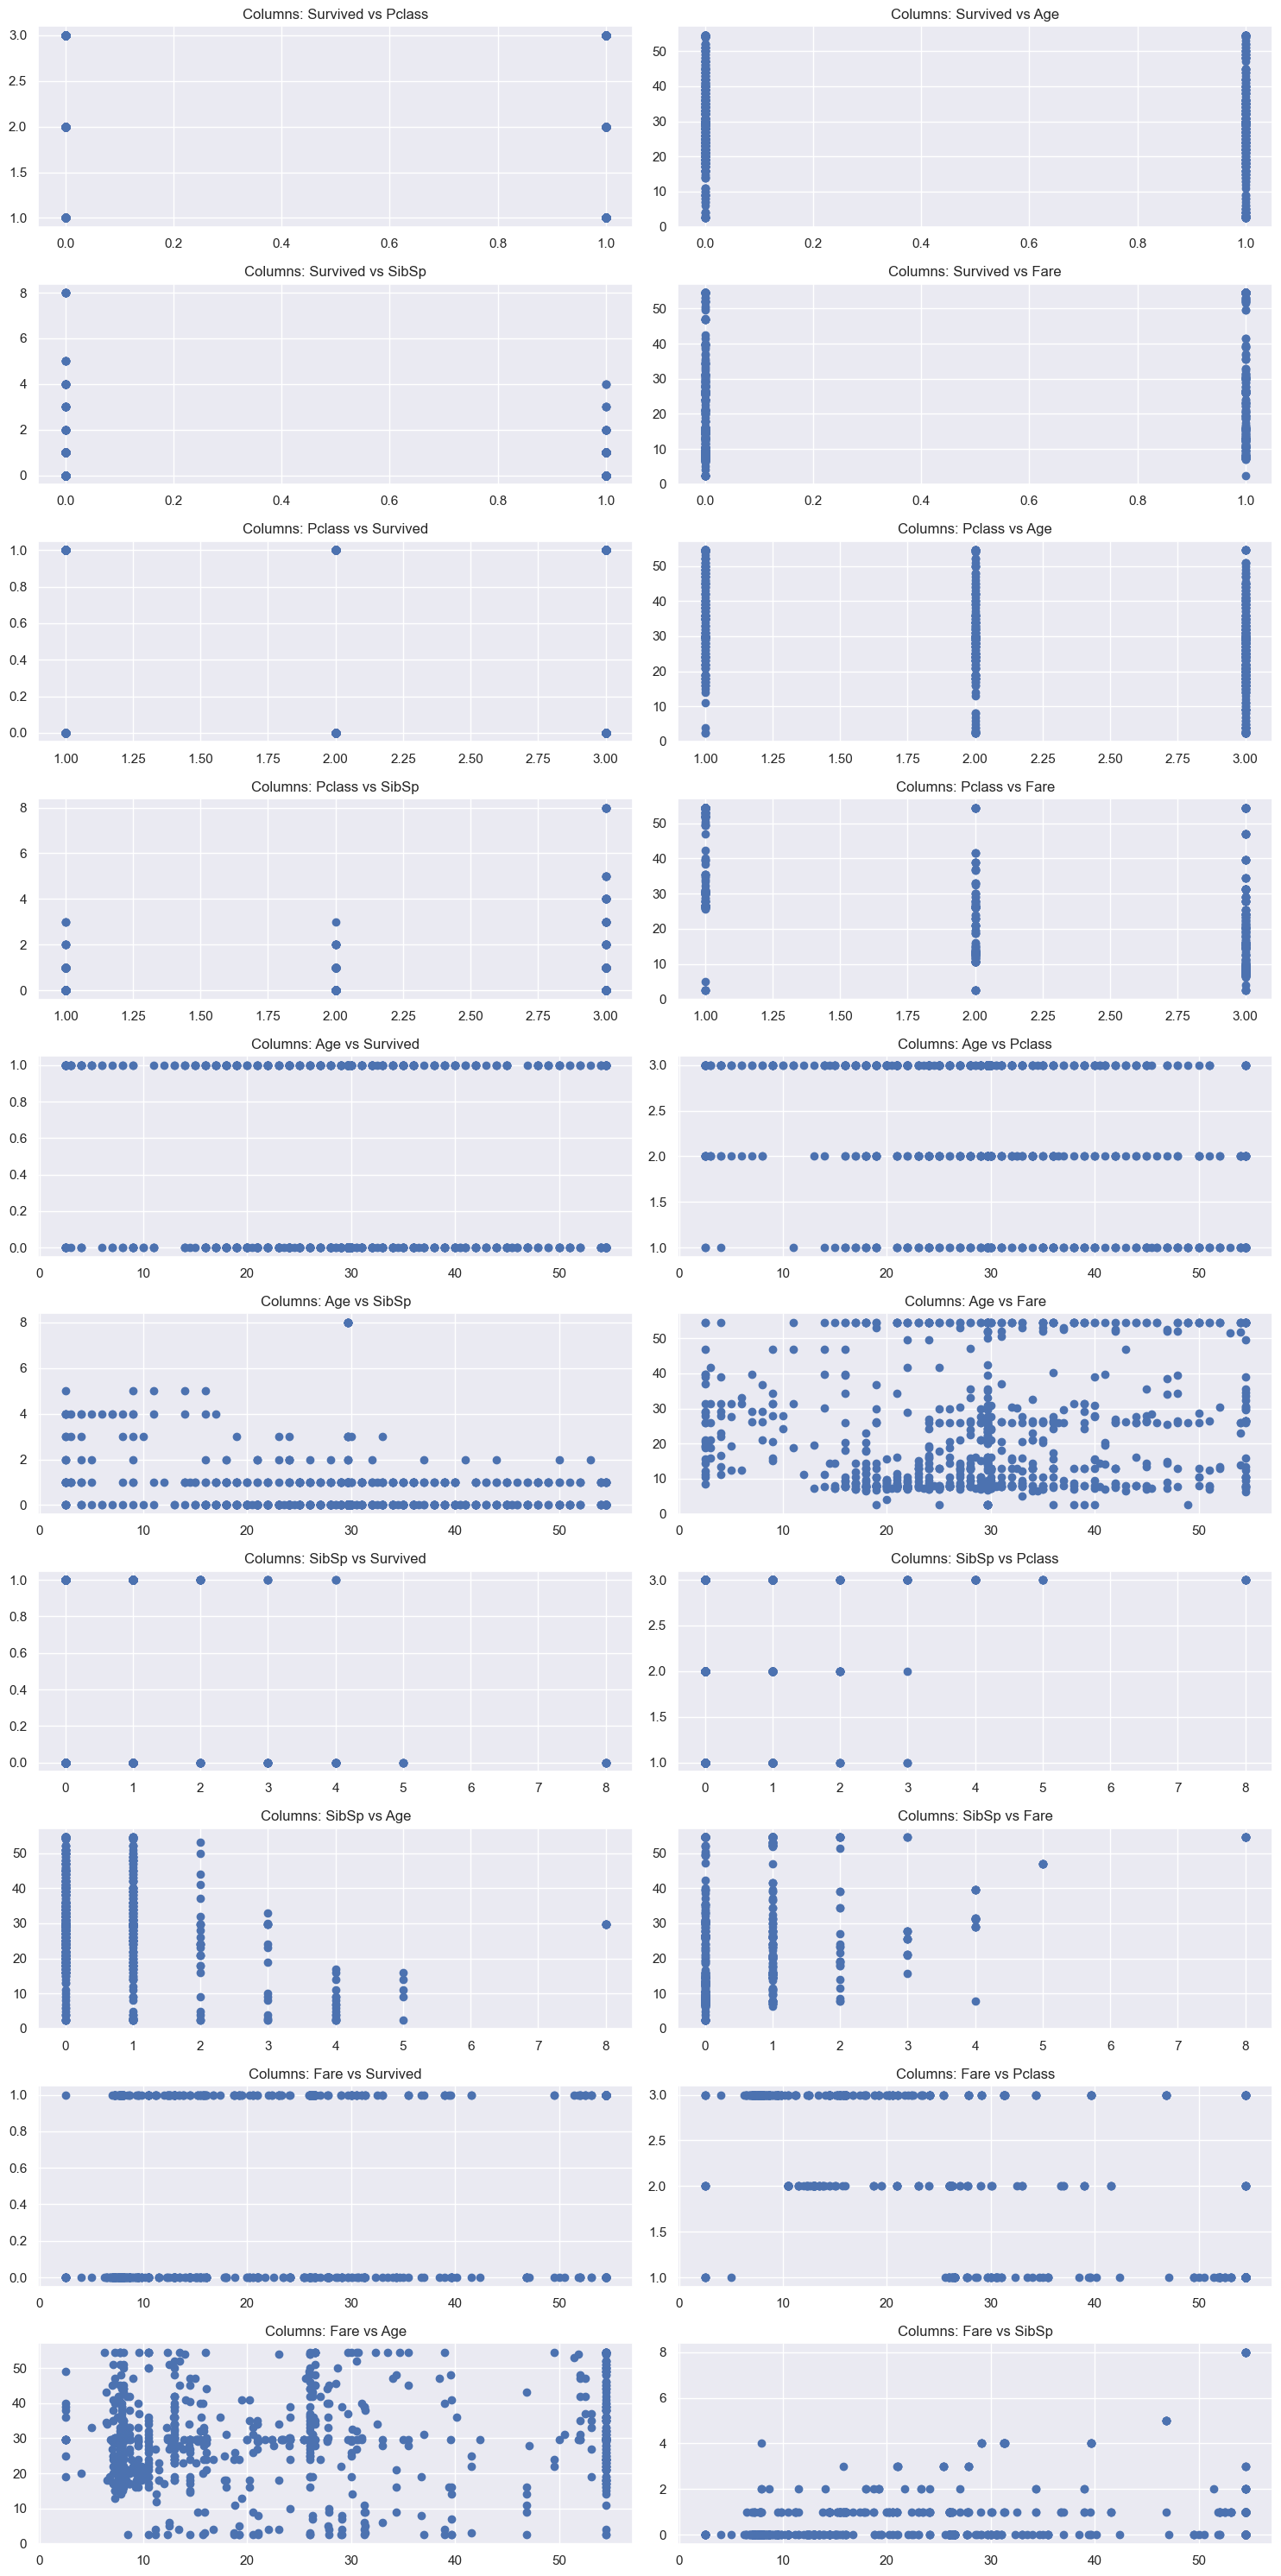

In [40]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 10 * 2

# Create a figure and axes for the subplots
fig, axes = plt.subplots(10, 2, figsize=(15, 30))  

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in num:
    for j in num:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 2, plot_counter % 2]  # Get the current subplot
            ax.scatter(tt[i], tt[j])
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**Correlation**

In [41]:
corr=tt.corr(numeric_only=True)
corr

,Survived,Pclass,Age,SibSp,Fare
Survived,1.000000,-0.338481,-0.065857,-0.035322,0.316587
Pclass,-0.338481,1.000000,-0.330962,0.083081,-0.722085
Age,-0.065857,-0.330962,1.000000,-0.238735,0.132317
SibSp,-0.035322,0.083081,-0.238735,1.000000,0.346025
Fare,0.316587,-0.722085,0.132317,0.346025,1.000000


**HeatMap**

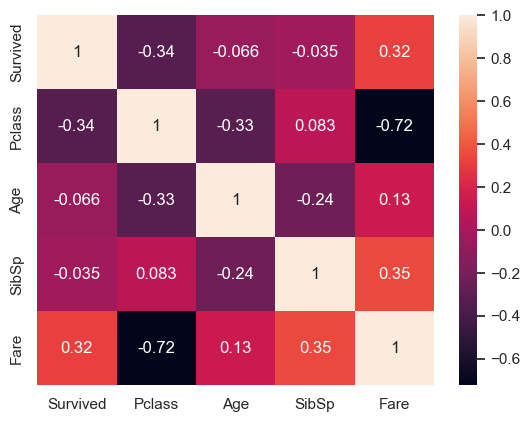

In [42]:
sns.heatmap(corr,annot=True)
plt.show()

In [43]:
for i in (num):
    print(i,tt[i].skew())

Survived 0.4785234382949897
Pclass -0.6305479068752845
Age 0.08084597035443017
SibSp 3.6953517271630565
Fare 0.8858773256317157


In [44]:
tt['SibSp'] = np.log1p(tt['SibSp'])

In [45]:
tt['SibSp'] = np.sqrt(tt['SibSp'])

In [46]:
tt['SibSp'].skew()

0.9672484745036443

In [47]:
for i in (num):
    print(i,tt[i].skew())

Survived 0.4785234382949897
Pclass -0.6305479068752845
Age 0.08084597035443017
SibSp 0.9672484745036443
Fare 0.8858773256317157


In [48]:
tt

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.000000,0.832555,7.250,S
1,1,1,female,38.000000,0.832555,54.500,C
2,1,3,female,26.000000,0.000000,7.925,S
3,1,1,female,35.000000,0.832555,53.100,S
4,0,3,male,35.000000,0.000000,8.050,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0.000000,13.000,S
887,1,1,female,19.000000,0.000000,30.000,S
888,0,3,female,29.699118,0.832555,23.450,S
889,1,1,male,26.000000,0.000000,30.000,C


**Convert categorical To Numerical**

In [49]:
for i in cat:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    tt[i]=le.fit_transform(tt[i])

In [50]:
tt

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1,22.000000,0.832555,7.250,2
1,1,1,0,38.000000,0.832555,54.500,0
2,1,3,0,26.000000,0.000000,7.925,2
3,1,1,0,35.000000,0.832555,53.100,2
4,0,3,1,35.000000,0.000000,8.050,2
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0.000000,13.000,2
887,1,1,0,19.000000,0.000000,30.000,2
888,0,3,0,29.699118,0.832555,23.450,2
889,1,1,1,26.000000,0.000000,30.000,0


**Machine learning**

In [51]:
X=tt.drop('Survived',axis=1)
y=tt['Survived']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [54]:
print(tt.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(891, 7)
(712, 6)
(179, 6)
(712,)
(179,)


**Decision Tree**

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred_dt=dtree.predict(X_test)

In [57]:
y_pred_dt

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [58]:
acc_dt=round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

In [59]:
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)
print(classification_report(y_test,y_pred_dt))

accuray is: 81.56
F1 is: 0.76
Precision is: 0.78
Recall is: 0.74
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       109
           1       0.78      0.74      0.76        70

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



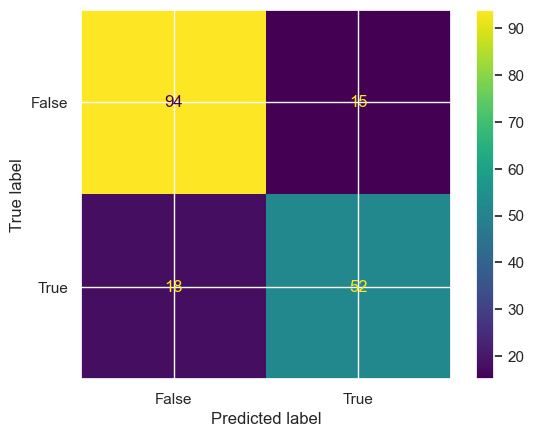

In [60]:
cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [61]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 94
False postive: 15
False negative: 18
True postive: 52


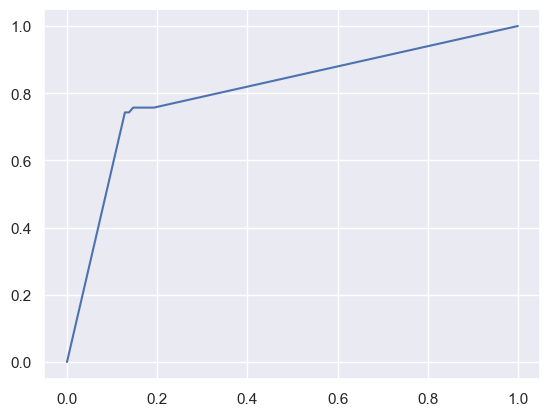

In [62]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

**Logistic Regression**

In [63]:
from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
logtree.fit(X_train,y_train)

LogisticRegression()

In [64]:
y_pred_log=logtree.predict(X_test)

In [65]:
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)
print(classification_report(y_test,y_pred_log))

accuray is: 81.56
F1 is: 0.74
Precision is: 0.82
Recall is: 0.67
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       109
           1       0.82      0.67      0.74        70

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



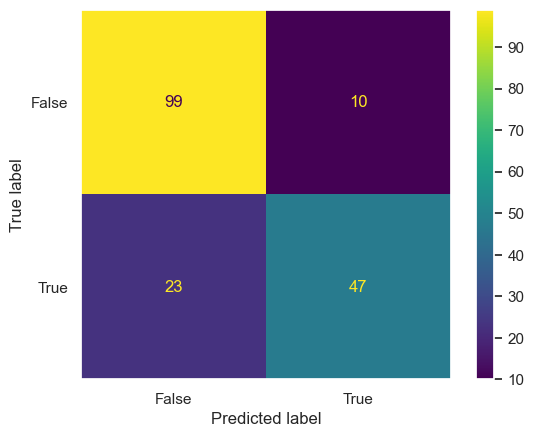

In [66]:
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [67]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 99
False postive: 10
False negative: 23
True postive: 47


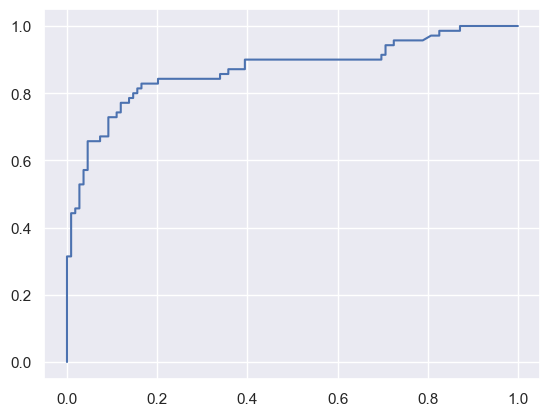

In [68]:
y_log_pred_prob=logtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Naive Bayes**

In [69]:
from sklearn.naive_bayes import GaussianNB
NBtree=GaussianNB()
NBtree.fit(X_train,y_train)

GaussianNB()

In [70]:
y_pred_NB=NBtree.predict(X_test)

In [71]:
y_pred_NB

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [72]:
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

accuray is: 79.33
F1 is: 0.73
Precision is: 0.75
Recall is: 0.71


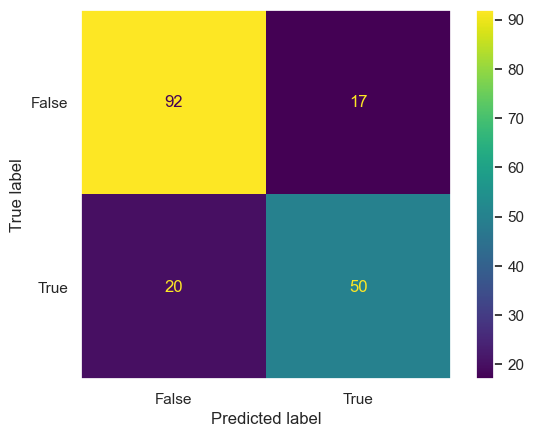

In [73]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [74]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 92
False postive: 17
False negative: 20
True postive: 50


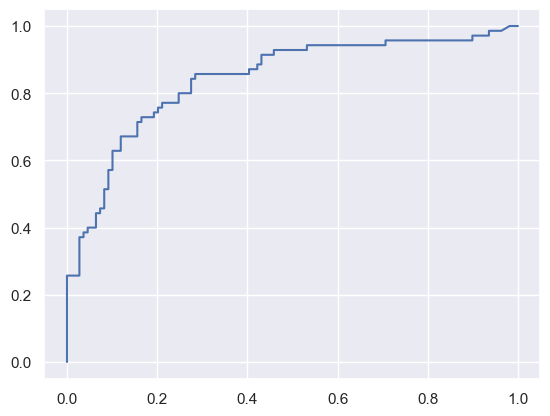

In [75]:
y_NB_pred_prob=NBtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**KNN**

In [76]:
from sklearn.neighbors import KNeighborsClassifier
KNNtree=KNeighborsClassifier()
KNNtree.fit(X_train,y_train)

KNeighborsClassifier()

In [77]:
y_pred_KNN=KNNtree.predict(X_test)

In [78]:
y_pred_KNN

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [79]:
acc_KNN= round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
print("accuray is:",acc_KNN)
print("F1 is:",f1_KNN)
print("Precision is:",precision_KNN)
print("Recall is:",recall_KNN)

accuray is: 67.04
F1 is: 0.55
Precision is: 0.59
Recall is: 0.51


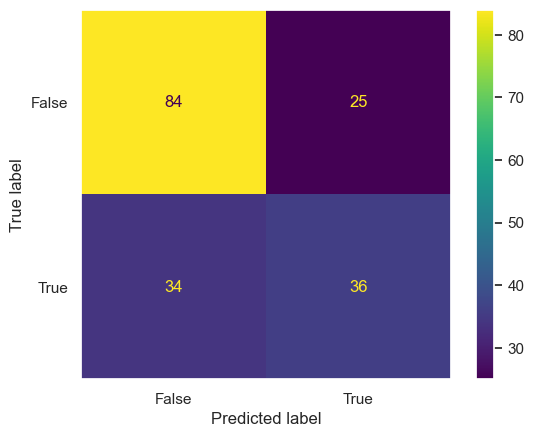

In [80]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_KNN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

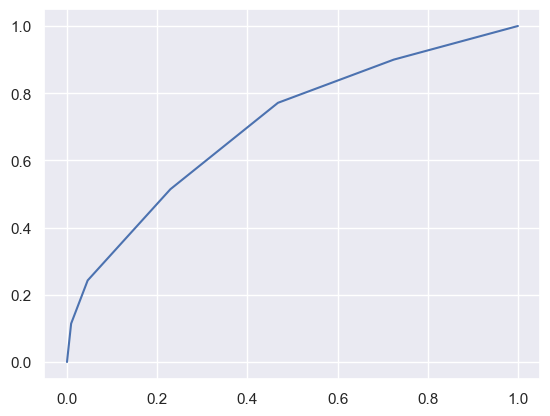

In [81]:
y_KNN_pred_prob=KNNtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Random Forest**

In [82]:
from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train,y_train)

RandomForestClassifier()

In [83]:
y_pred_RF=RFtree.predict(X_test)

In [84]:
y_pred_RF

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [85]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 83.8
F1 is: 0.79
Precision is: 0.81
Recall is: 0.77


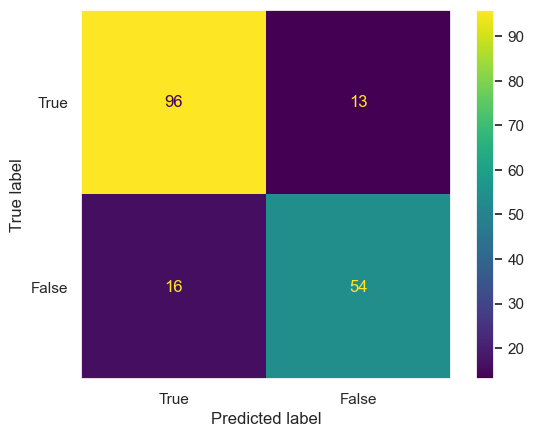

In [86]:
cmt=confusion_matrix(y_test,y_pred_RF)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[True,False])
disp.plot()
plt.grid(False)
plt.show()

In [87]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 96
False postive: 13
False negative: 16
True postive: 54


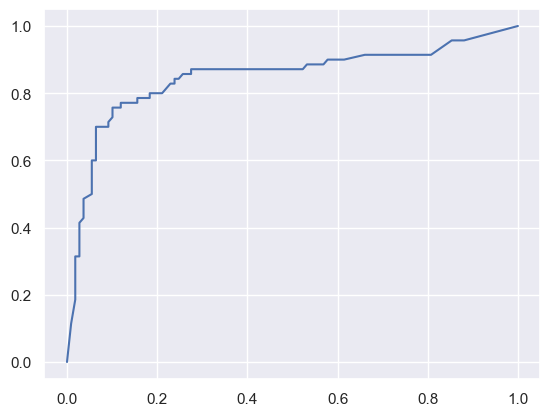

In [88]:
y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob)
plt.plot(fpr,tpr)
plt.show()

**Gradient Boosting**

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [90]:
y_pred_GB=GB.predict(X_test)

In [91]:
y_pred_GB

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [92]:
acc_GB=round(accuracy_score(y_test,y_pred_GB)*100,2)
f1_GB=round(f1_score(y_test,y_pred_GB),2)
precision_GB=round(precision_score(y_test,y_pred_GB),2)
recall_GB=round(recall_score(y_test,y_pred_GB),2)
print("accuray is:",acc_GB)
print("F1 is:",f1_GB)
print("Precision is:",precision_GB)
print("Recall is:",recall_GB)

accuray is: 85.47
F1 is: 0.8
Precision is: 0.87
Recall is: 0.74


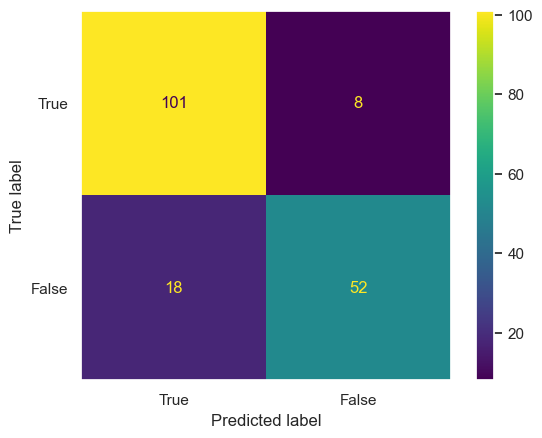

In [93]:
cmt=confusion_matrix(y_test,y_pred_GB)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[True,False])
disp.plot()
plt.grid(False)
plt.show()

In [94]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_GB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 101
False postive: 8
False negative: 18
True postive: 52


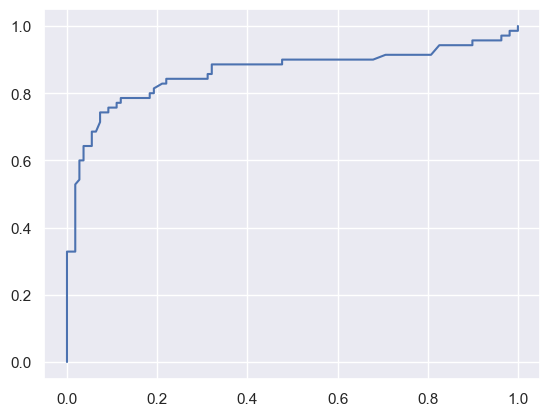

In [95]:
y_GB_pred_prob=GB.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_GB_pred_prob)
plt.plot(fpr,tpr)
plt.show()

**Comparing Which model is best**

In [96]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF,acc_GB],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF,precision_GB],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF,recall_GB],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF,f1_GB]}

pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest','Gradient Boosting'])

,Accuracy,Precision,Recall,F1-score
DT,81.56,0.78,0.74,0.76
KNN,67.04,0.59,0.51,0.55
Logistic,81.56,0.82,0.67,0.74
Naive Bayes,79.33,0.75,0.71,0.73
Random Forest,83.80,0.81,0.77,0.79
Gradient Boosting,85.47,0.87,0.74,0.80


# Model Devlopment using Hyper Parameter tuning 

In [97]:
tt

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1,22.000000,0.832555,7.250,2
1,1,1,0,38.000000,0.832555,54.500,0
2,1,3,0,26.000000,0.000000,7.925,2
3,1,1,0,35.000000,0.832555,53.100,2
4,0,3,1,35.000000,0.000000,8.050,2
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0.000000,13.000,2
887,1,1,0,19.000000,0.000000,30.000,2
888,0,3,0,29.699118,0.832555,23.450,2
889,1,1,1,26.000000,0.000000,30.000,0


In [98]:
X=tt.drop('Survived',axis=1)
y=tt['Survived']

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [100]:
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(712, 6)
(179, 6)
(712,)
(179,)


In [101]:
from sklearn.model_selection import GridSearchCV,cross_val_score

# Decision Tree

In [102]:
gt=DecisionTreeClassifier()
gt

DecisionTreeClassifier()

In [103]:
gt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [104]:
param_gt={
    "criterion":['gini','entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0,42]
}

In [105]:
import time 
start=time.time()
gt_search=GridSearchCV(gt,param_gt,
                      scoring='accuracy',
                      cv=5,
                      verbose=True)
end=time.time()
print('total time taken is :',(end-start))

total time taken is : 0.0


In [106]:
gt_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [107]:
start=time.time()
gt_search.fit(X_train,y_train)

end=time.time()
print('total time taken is:',(end-start))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
total time taken is: 8.680957317352295


In [108]:
gt.fit(X_train,y_train)

DecisionTreeClassifier()

In [109]:
 gt_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=4,
                       random_state=42)

In [110]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',
                            max_depth=6,
                            min_samples_leaf=4,
                            min_samples_split=2,
                            random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, random_state=0)

In [111]:
gt_search.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'random_state': 42}

In [112]:
gt_search.best_score_

0.8231458682162908

In [113]:
y_pred_gt=dtree.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [115]:
acc_gt=round(accuracy_score(y_test,y_pred_gt)*100,2)
f1_gt=round(f1_score(y_test,y_pred_gt),2)
recall_gt=round(recall_score(y_test,y_pred_gt),2)
precision_gt=round(precision_score(y_test,y_pred_gt))

print("accuracy is:",acc_gt)
print("f1 is:",f1_gt)
print("recall is:",recall_gt)
print("precision is:",precision_gt)

accuracy is: 81.01
f1 is: 0.71
recall is: 0.59
precision is: 1


In [116]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

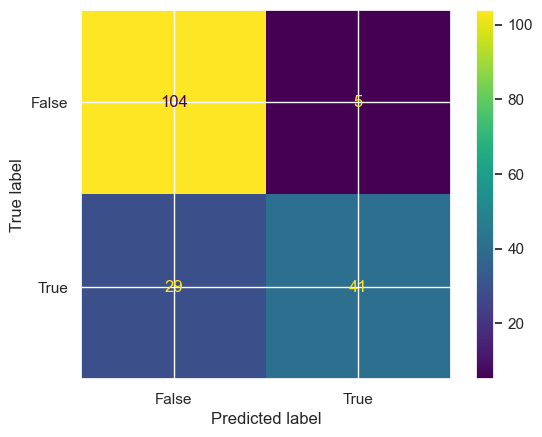

In [117]:
cmt=confusion_matrix(y_test,y_pred_gt)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [118]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_gt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 101
False postive: 5
False negative: 29
True postive: 41


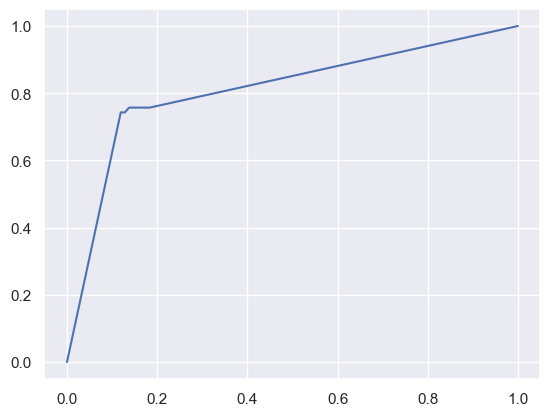

In [119]:
# ROC-AUC Curve
y_gt_pred_prob=gt.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_gt_pred_prob)
plt.plot(fpr,tpr)
plt.show()

In [120]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
f1 = imp_df.sort_values(by="Importance", ascending=False)
f1

,Feature Name,Importance
1,Sex,0.481573
4,Fare,0.176642
0,Pclass,0.150793
2,Age,0.140959
3,SibSp,0.037363
5,Embarked,0.012671


# Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression()

In [122]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_log=LogisticRegression()
grid_log

LogisticRegression()

In [123]:
grid_log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [124]:
param_grid1={
    'C':[1.1,'entropy'],
    'intercept_scaling': [4, 5, 6, 7, 8,9],
    'fit_intercept': [True],
    'warm_start': [False],
    'max_iter': [0,41]
}

In [125]:
import time
start=time.time()
grid_search1=GridSearchCV(grid_log,param_grid1,
                         scoring='accuracy',
                         cv=4,
                         verbose=True)
end=time.time()
print('total time taken is :',(end-start))

total time taken is : 0.0


In [126]:
grid_search1.fit(X_train,y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [1.1, 'entropy'], 'fit_intercept': [True],
                         'intercept_scaling': [4, 5, 6, 7, 8, 9],
                         'max_iter': [0, 41], 'warm_start': [False]},
             scoring='accuracy', verbose=True)

In [127]:
grid_search1.best_estimator_

LogisticRegression(C=1.1, intercept_scaling=4, max_iter=41)

In [128]:
grid_search1.best_score_

0.7724719101123596

In [129]:
from sklearn.linear_model import LogisticRegression
import time

logistic_regression = LogisticRegression()
start = time.time()
grid_search1.fit(X_train,y_train)
end = time.time()
print('Total time taken is:',(end-start),'seconds')

Fitting 4 folds for each of 24 candidates, totalling 96 fits
Total time taken is: 0.5394208431243896 seconds


In [130]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C=1.0,
                      fit_intercept=True,
                      intercept_scaling=4,
                      max_iter=42,
                      warm_start=False)
log.fit(X_train,y_train)

LogisticRegression(intercept_scaling=4, max_iter=42)

In [131]:
grid_search1.best_score_

0.7724719101123596

In [132]:
grid_search1.best_params_

{'C': 1.1,
 'fit_intercept': True,
 'intercept_scaling': 4,
 'max_iter': 41,
 'warm_start': False}

In [133]:
# Matrix
acc_log=round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)

print("accuracy is:",acc_log)
print("f1 is:",f1_log)
print("recall is:",recall_log)
print("precision is:",precision_log)

accuracy is: 81.56
f1 is: 0.74
recall is: 0.67
precision is: 0.82


In [134]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

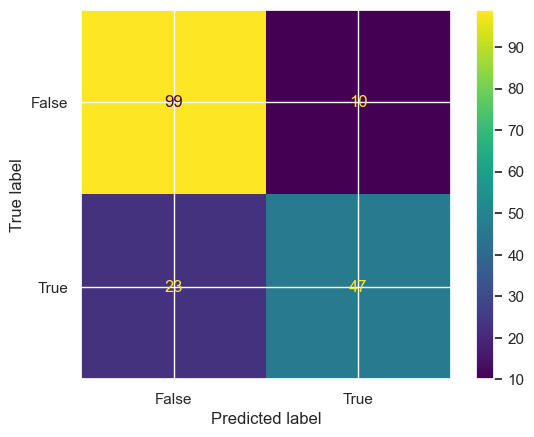

In [135]:
cmt=confusion_matrix(y_test,y_pred_log)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [136]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 101
False postive: 10
False negative: 23
True postive: 47


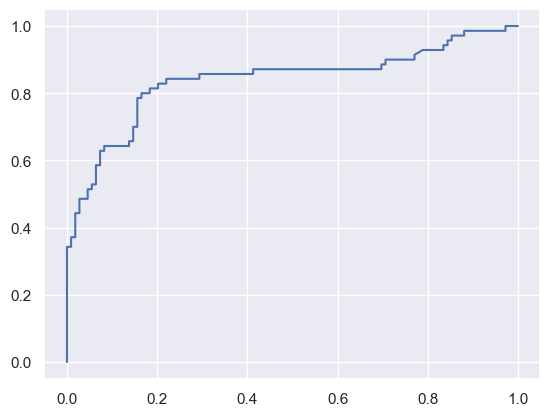

In [137]:
# ROC-AUC Curve
y_log_pred_prob=grid_search1.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob)
plt.plot(fpr,tpr)
plt.show()

# Naive Bayes

In [138]:
from sklearn.naive_bayes import GaussianNB
GaussianNB()

GaussianNB()

In [139]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_NB=GaussianNB()
grid_NB

GaussianNB()

In [140]:
grid_NB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [141]:
param_NB1={
    'priors':[None],
    'var_smoothing': [0.001]
}

In [142]:
import time
start=time.time()
grid_search2=GridSearchCV(grid_NB,param_NB1,
                         scoring='accuracy',
                         cv=3,
                         verbose=True)
end=time.time()
print('total time taken is:',(end-start))

total time taken is: 0.0


In [143]:
grid_search2

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'priors': [None], 'var_smoothing': [0.001]},
             scoring='accuracy', verbose=True)

In [144]:
grid_search2.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'priors': [None], 'var_smoothing': [0.001]},
             scoring='accuracy', verbose=True)

In [145]:
start=time.time()
grid_search2.fit(X_train,y_train)

end=time.time()
print('total time taken is :',(end-start))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
total time taken is : 0.024132728576660156


In [146]:
grid_search2.best_estimator_

GaussianNB(var_smoothing=0.001)

In [147]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB(priors=None,var_smoothing=0.001)
NB.fit(X_train,y_train)

GaussianNB(var_smoothing=0.001)

In [148]:
grid_search2.best_score_

0.6938446264581782

In [149]:
grid_search2.best_params_

{'priors': None, 'var_smoothing': 0.001}

In [150]:
y_pred_NB=NB.predict(X_test)

In [151]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

In [152]:
acc_NB=round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB))

print("accuracy is:",acc_NB)
print("f1 is:",f1_NB)
print("recall is:",recall_NB)
print("precision is:",precision_NB)

accuracy is: 69.27
f1 is: 0.51
recall is: 0.41
precision is: 1


In [153]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

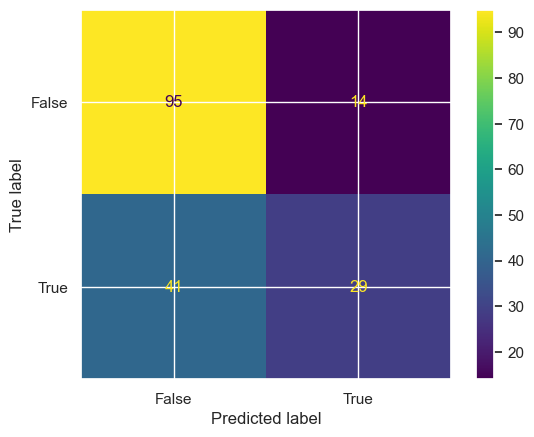

In [154]:
cmt=confusion_matrix(y_test,y_pred_NB)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [155]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 101
False postive: 14
False negative: 41
True postive: 29


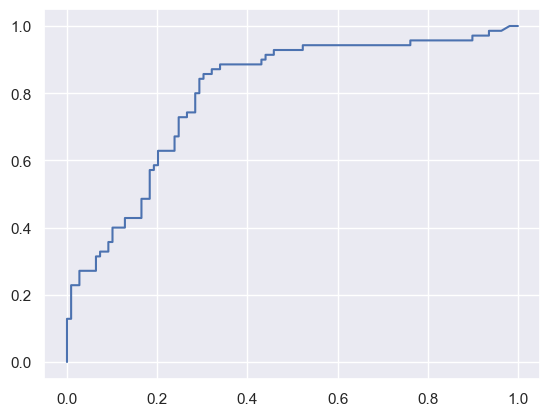

In [156]:
# ROC-AUC Curve
y_NB_pred_prob=grid_search2.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob)
plt.plot(fpr,tpr)
plt.show()

# KNN

In [157]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier()

In [158]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_KNN=KNeighborsClassifier()
grid_KNN

KNeighborsClassifier()

In [159]:
grid_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [160]:
param_KNN={
    'n_neighbors': [3,4,5,6],
    'leaf_size': [34,12],
    'algorithm':['auto','ball_tree','kd_tree','brute']
    
}

In [161]:
import time
start=time.time()
grid_search3=GridSearchCV(grid_KNN,param_KNN,
                         scoring='accuracy',
                         cv=3,
                         verbose=True)
end=time.time()
print('total time taken is :',(end-start))

total time taken is : 0.0


In [162]:
grid_search3

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [34, 12], 'n_neighbors': [3, 4, 5, 6]},
             scoring='accuracy', verbose=True)

In [163]:
start=time.time()
grid_search3.fit(X_train,y_train)

end=time.time()
print('total time taken is:',(end-start))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
total time taken is: 2.9504384994506836


In [164]:
grid_search3.best_estimator_

KNeighborsClassifier(leaf_size=34, n_neighbors=6)

In [165]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=12)
KN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [166]:
grid_search3.best_score_

0.7149534919453013

In [167]:
grid_search3.best_params_

{'algorithm': 'auto', 'leaf_size': 34, 'n_neighbors': 6}

In [168]:
y_pred_KNN=KN.predict(X_test)

In [169]:
# Matrix
acc_KNN=round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN))

print("accuracy is:",acc_KNN)
print("f1 is:",f1_KNN)
print("recall is:",recall_KNN)
print("precision is:",precision_KNN)

accuracy is: 68.72
f1 is: 0.49
recall is: 0.39
precision is: 1


In [170]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

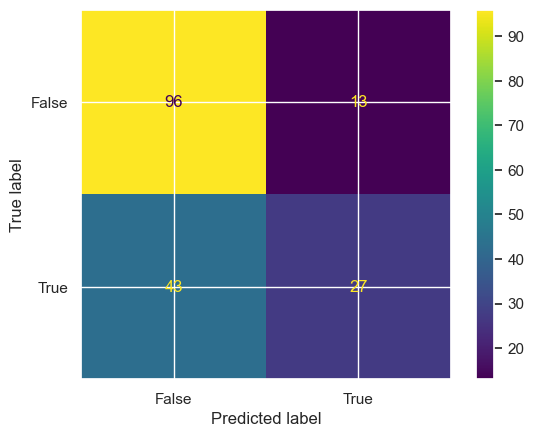

In [171]:
cmt=confusion_matrix(y_test,y_pred_KNN)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [172]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 101
False postive: 13
False negative: 43
True postive: 27


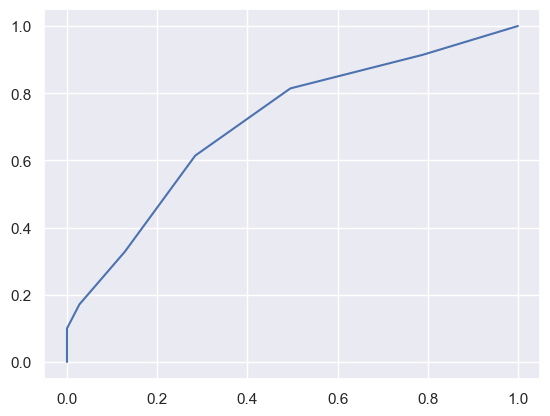

In [173]:
# ROC-AUC Curve
y_KNN_pred_prob=grid_search3.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob)
plt.plot(fpr,tpr)
plt.show()

# Random Forest

In [174]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()

RandomForestClassifier()

In [175]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_RF=RandomForestClassifier()
grid_RF

RandomForestClassifier()

In [176]:
grid_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [177]:
param_RF={
    'min_samples_leaf': [3,4,5,6],
    'oob_score': [False],
    'criterion':['gini']
    
}

In [178]:
import time
start=time.time()
grid_search4=GridSearchCV(grid_RF,param_RF,
                         scoring='accuracy',
                         cv=4,
                         verbose=True)
end=time.time()
print('total time taken is :',(end-start))

total time taken is : 0.0


In [179]:
grid_search4

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'oob_score': [False]},
             scoring='accuracy', verbose=True)

In [180]:
start=time.time()
grid_search4.fit(X_train,y_train)

end=time.time()
print('total time taken is :',(end-start))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
total time taken is : 3.04046893119812


In [181]:
grid_search4.best_estimator_

RandomForestClassifier(min_samples_leaf=3)

In [182]:
from sklearn.ensemble import RandomForestClassifier
RFTree=RandomForestClassifier(criterion='gini',
                              max_depth= 5,
                              max_features='sqrt',
                              n_estimators=100,
                              random_state=0)
RFTree.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [183]:
grid_search4.best_score_

0.8146067415730336

In [184]:
grid_search4.best_params_

{'criterion': 'gini', 'min_samples_leaf': 3, 'oob_score': False}

In [185]:
y_pred_RF=RFTree.predict(X_test)

In [186]:
acc_RF=round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF))

print("accuracy is:",acc_RF)
print("f1 is:",f1_RF)
print("recall is:",recall_RF)
print("precision is:",precision_RF)

accuracy is: 84.36
f1 is: 0.77
recall is: 0.66
precision is: 1


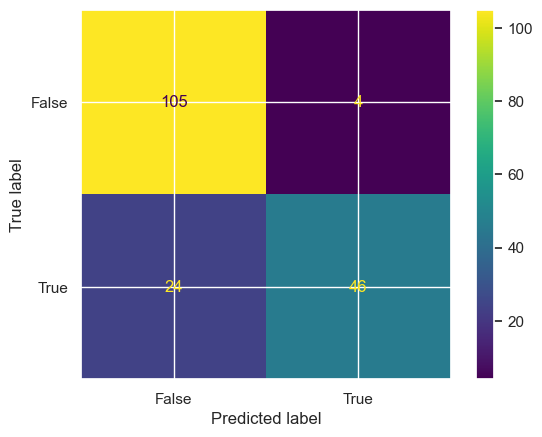

In [187]:
cmt=confusion_matrix(y_test,y_pred_RF)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [188]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 101
False postive: 4
False negative: 24
True postive: 46


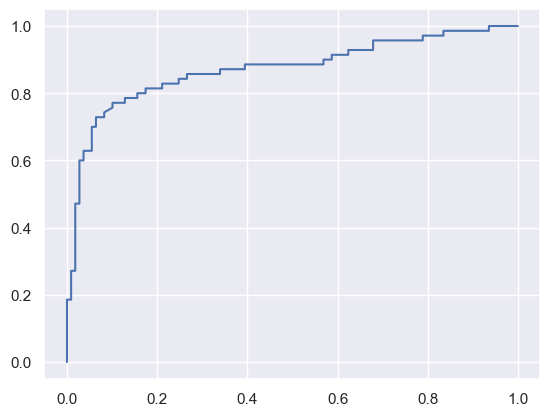

In [189]:
# ROC-AUC Curve
y_RF_pred_prob=grid_search4.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob)
plt.plot(fpr,tpr)
plt.show()

In [190]:
dict1={'Accuracy':[acc_gt,acc_KNN,acc_log,acc_NB,acc_RF],
      'precision':[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF],
      'recall':[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF],
      'f1-score':[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF]}
pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest'])

,Accuracy,precision,recall,f1-score
DT,81.01,0.78,0.74,0.76
KNN,68.72,1.00,0.39,0.49
Logistic,81.56,0.82,0.67,0.74
Naive Bayes,69.27,1.00,0.41,0.51
Random Forest,84.36,1.00,0.66,0.77


# Documentation

- The Titanic dataset is a popular dataset often used in machine learning and data analysis tutorials. It contains information  about passengers aboard the RMS Titanic, including whether they survived or not. Here's a brief overview of the variables typically included in the dataset:

- 1)PassengerId: Unique identifier for each passenger.
- 2)Survived: Indicates whether the passenger survived (1) or not (0).
- 3)Pclass: Ticket class (1st, 2nd, or 3rd).
- 4)Name: Passenger's name.
- 5)Sex: Passenger's gender.
- 6)Age: Passenger's age in years.
- 7)SibSp: Number of siblings/spouses aboard the Titanic.
- 8)Parch: Number of parents/children aboard the Titanic.
- 9)Ticket: Ticket number.
- 10)Fare: Passenger fare.
- 11)Cabin: Cabin number.
- 12)Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

# Test data

In [237]:
file_path1="C:\\Users\\abhin\\Downloads\\test (1).csv"

In [238]:
ts=pd.read_csv(file_path1)
ts

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [239]:
ts.shape

(418, 11)

In [240]:
ts.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [241]:
dff=ts['PassengerId']
dff

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [242]:
col=['PassengerId','Name','Ticket','Cabin','Parch']
ts.drop(col,axis=1,inplace=True)

In [243]:
num=ts.select_dtypes(include=['number']).columns
cat=ts.select_dtypes(include=['object', 'category']).columns
print('Cat:',cat)
print('num:',num)

Cat: Index(['Sex', 'Embarked'], dtype='object')
num: Index(['Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')


In [244]:
for i in cat:
    a=ts[i].unique()
    print(i,a)

Sex ['male' 'female']
Embarked ['Q' 'S' 'C']


In [245]:
ts[cat]=ts[cat].fillna(ts[cat].mode().iloc[0])

In [246]:
ts[num]=ts[num].fillna(ts[num].median())

In [247]:
ts.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

In [248]:
cat

Index(['Sex', 'Embarked'], dtype='object')

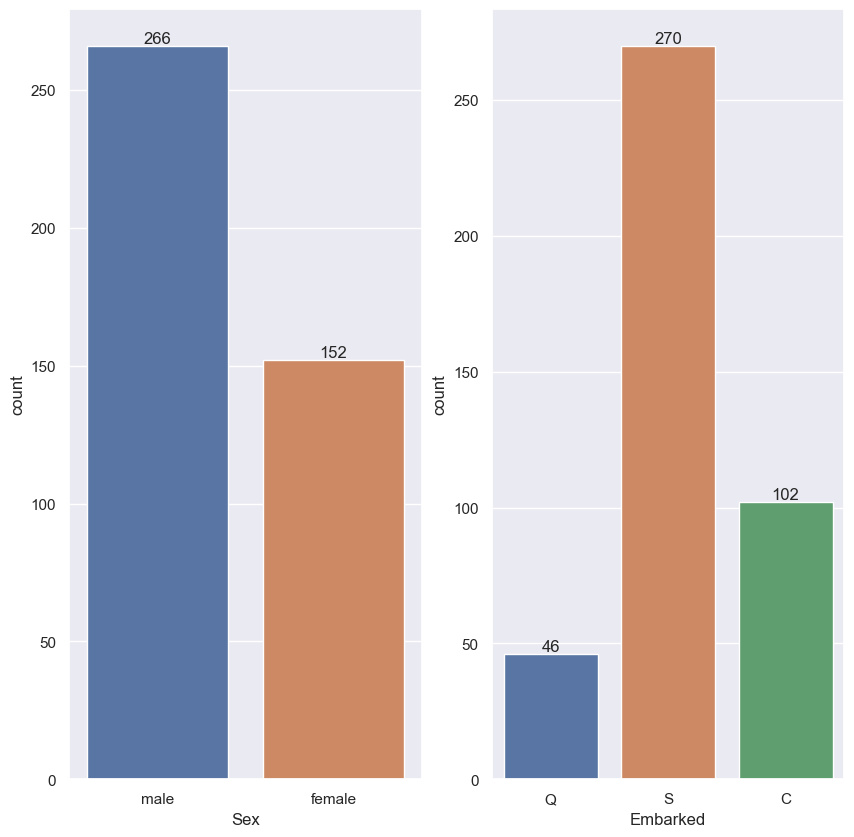

In [249]:
plt.figure(figsize=(10,10))
for i,column in enumerate(cat):
    plt.subplot(1,2,i+1)

    ax=sns.countplot(data=ts,x=column)
    ax.bar_label(ax.containers[0])
plt.show()

In [250]:
for i in num:
    d_count=round(ts[i].count(),2)
    d_max=round(ts[i].max(),2)
    d_min=round(ts[i].min(),2)
    d_mean=round(ts[i].mean(),2)
    d_median=round(ts[i].median(),2)
    d_std=round(ts[i].std(),2)

    print(i,'count:',d_count)
    print(i,'max:',d_max)
    print(i,'min:',d_min)
    print(i,'mean:',d_mean)
    print(i,'median:',d_median)
    print(i,'std:',d_std)
    print('------------------------------------')

Pclass count: 418
Pclass max: 3
Pclass min: 1
Pclass mean: 2.27
Pclass median: 3.0
Pclass std: 0.84
------------------------------------
Age count: 418
Age max: 76.0
Age min: 0.17
Age mean: 29.6
Age median: 27.0
Age std: 12.7
------------------------------------
SibSp count: 418
SibSp max: 8
SibSp min: 0
SibSp mean: 0.45
SibSp median: 0.0
SibSp std: 0.9
------------------------------------
Fare count: 418
Fare max: 512.33
Fare min: 0.0
Fare mean: 35.58
Fare median: 14.45
Fare std: 55.85
------------------------------------


In [251]:
for i in num:
    q1=np.quantile(ts[i],0.25)
    q2=np.quantile(ts[i],0.50)
    q3=np.quantile(ts[i],0.75)
    print(i,'q1:',q1)
    print(i,'q2:',q2)
    print(i,'q3:',3)
    print('------------')

Pclass q1: 1.0
Pclass q2: 3.0
Pclass q3: 3
------------
Age q1: 23.0
Age q2: 27.0
Age q3: 3
------------
SibSp q1: 0.0
SibSp q2: 0.0
SibSp q3: 3
------------
Fare q1: 7.8958
Fare q2: 14.4542
Fare q3: 3
------------


In [252]:
ts.describe()

,Pclass,Age,SibSp,Fare
count,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.599282,0.447368,35.576535
std,0.841838,12.703770,0.896760,55.850103
min,1.000000,0.170000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,31.471875
max,3.000000,76.000000,8.000000,512.329200


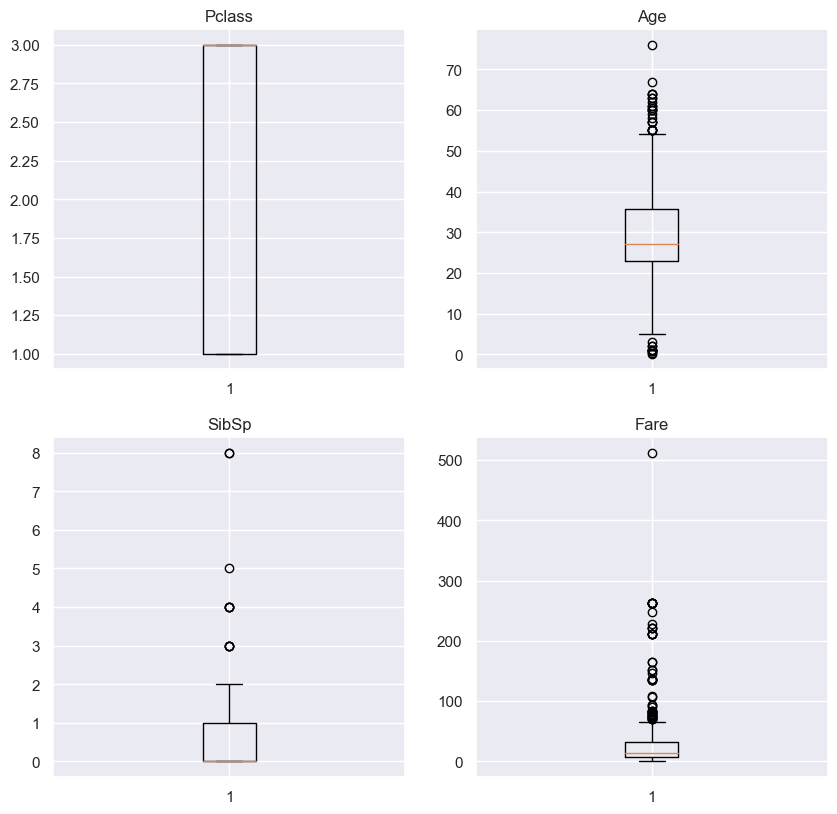

In [253]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(ts[column])
plt.show()

In [254]:
num

Index(['Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')

In [255]:
q1=np.quantile(ts['Fare'],0.25)
q2=np.quantile(ts['Fare'],0.50)
q3=np.quantile(ts['Fare'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=ts['Fare']>ub1
con2=ts['Fare']<lb1
outlier=ts['Fare'][con1|con2].values
outlier

array([ 82.2667, 262.375 ,  76.2917, 263.    , 262.375 , 262.375 ,
       263.    , 211.5   , 211.5   , 221.7792,  78.85  , 221.7792,
        75.2417, 151.55  , 262.375 ,  83.1583, 221.7792,  83.1583,
        83.1583, 247.5208,  69.55  , 134.5   , 227.525 ,  73.5   ,
       164.8667, 211.5   ,  71.2833,  75.25  , 106.425 , 134.5   ,
       136.7792,  75.2417, 136.7792,  82.2667,  81.8583, 151.55  ,
        93.5   , 135.6333, 146.5208, 211.3375,  79.2   ,  69.55  ,
       512.3292,  73.5   ,  69.55  ,  69.55  , 134.5   ,  81.8583,
       262.375 ,  93.5   ,  79.2   , 164.8667, 211.5   ,  90.    ,
       108.9   ])

In [256]:
len(outlier)

55

In [257]:
ts['Fare']=np.clip(ts['Fare'],lb1,ub1)

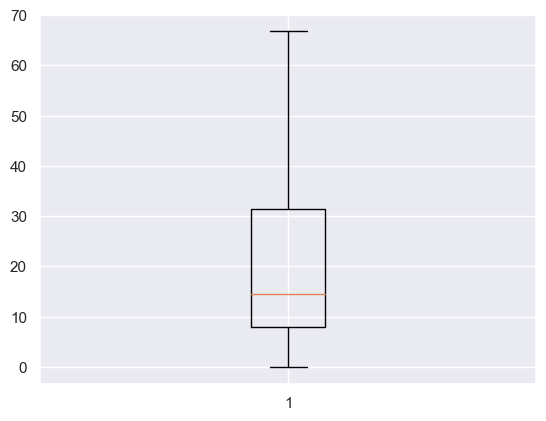

In [258]:
plt.boxplot(ts['Fare'])
plt.show()

In [259]:
cat

Index(['Sex', 'Embarked'], dtype='object')

In [260]:
col1=pd.crosstab(ts['Sex'],ts['Embarked'])

In [261]:
col1

Embarked,C,Q,S
Sex,,,
female,40,24,88
male,62,22,182


In [262]:
corr=ts.corr(numeric_only=True)
corr

,Pclass,Age,SibSp,Fare
Pclass,1.000000,-0.467853,0.001087,-0.748755
Age,-0.467853,1.000000,-0.071197,0.356353
SibSp,0.001087,-0.071197,1.000000,0.303424
Fare,-0.748755,0.356353,0.303424,1.000000


In [263]:
for i in cat:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    ts[i]=le.fit_transform(ts[i])

In [264]:
ts

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,1,34.5,0,7.829200,1
1,3,0,47.0,1,7.000000,2
2,2,1,62.0,0,9.687500,1
3,3,1,27.0,0,8.662500,2
4,3,0,22.0,1,12.287500,2
...,...,...,...,...,...,...
413,3,1,27.0,0,8.050000,2
414,1,0,39.0,0,66.835988,0
415,3,1,38.5,0,7.250000,2
416,3,1,27.0,0,8.050000,2


In [265]:
y_pred_RF=RFTree.predict(ts)

In [268]:
pred_df=pd.DataFrame(y_pred_RF,columns=['Survived'])
pred_df

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [272]:
b=pd.concat([dff,pred_df],axis=1)

In [273]:
b

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [274]:
b=b.set_index('PassengerId')
b

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0
